In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# scikit-learn のインストール後に、ランタイムを再起動してください
!pip install scikit-learn==1.1

In [4]:
# データセットの読み込み
from sklearn.datasets import load_boston
dataset = load_boston()
x, t = dataset.data, dataset.target
columns = dataset.feature_names

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
type(x), x.shape, type(t), t.shape

(numpy.ndarray, (506, 13), numpy.ndarray, (506,))

In [6]:
df = pd.DataFrame(x, columns=columns)
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [7]:
# 目標値を追加
df['Target'] = t
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [8]:
# 入力変数と目的変数の切り分け
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# 2 つに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [11]:
# Step 1：モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
# Step 2：モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [13]:
# 学習後のパラメータ w
model.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

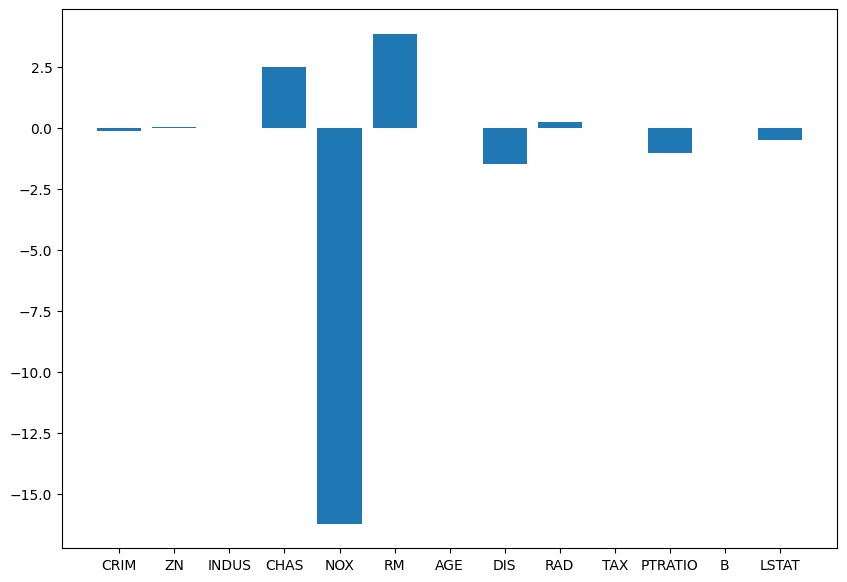

In [14]:
# パラメータの分布をヒストグラムで可視化
plt.figure(figsize=(10, 7))
plt.bar(x=columns, height=model.coef_);

In [15]:
# 学習後のバイアス b
model.intercept_

37.93710774183308

In [16]:
# Step 3：モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7645451026942548
test score :  0.6733825506400171


In [17]:
# 推論
y = model.predict(x_test)

In [18]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  24.935707898576915
目標値:  22.6


In [19]:
# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [20]:
# モデルの学習
ridge.fit(x_train, t_train)

Ridge(alpha=1)

In [21]:
# モデルの検証
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.7623440182689594
test score :  0.6665819091486687


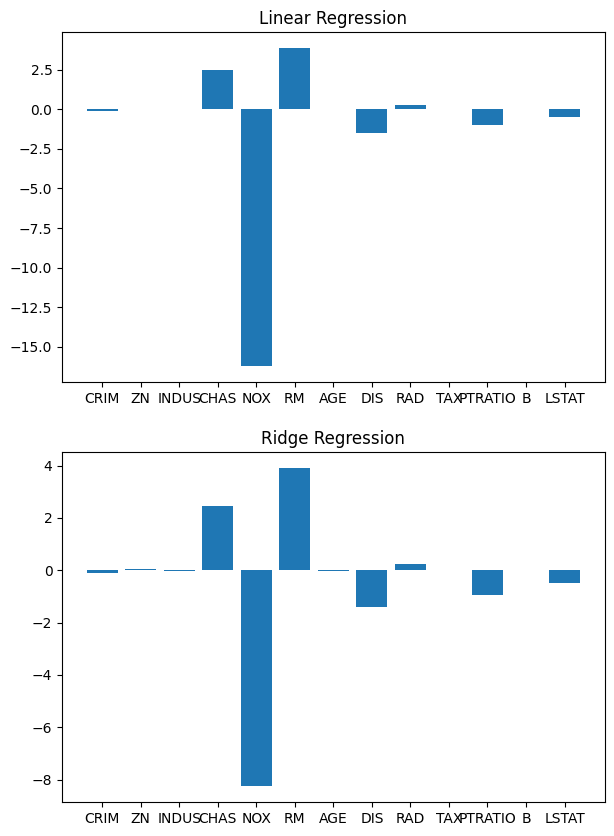

In [22]:
# 箱を準備
fig = plt.figure(figsize=(7, 10))

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# リッジ回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=columns, height=ridge.coef_)
ax2.set_title('Ridge Regression');

In [23]:
# モデルの定義
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)

In [24]:
# モデルの学習
lasso.fit(x_train, t_train)

Lasso(alpha=1)

In [25]:
# モデルの検証
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))

train score :  0.7084095500978868
test score :  0.6115433359595555


In [26]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso の特徴量 : ', np.sum(lasso.coef_ != 0))

元の特徴量の数 :  13
Lasso の特徴量 :  10


In [27]:
# アルファを変更
lasso_005 = Lasso(alpha=0.05)
lasso_005.fit(x_train, t_train)

print('train score : ', lasso_005.score(x_train, t_train))
print('test score : ', lasso_005.score(x_test, t_test))

train score :  0.7548928631432029
test score :  0.6541502573235292


In [28]:
# 0 になっていない特徴量の数
print('元の特徴量の数 : ', x.shape[1])
print('Lasso005 の特徴量 : ', np.sum(lasso_005.coef_ != 0))

元の特徴量の数 :  13
Lasso005 の特徴量 :  12


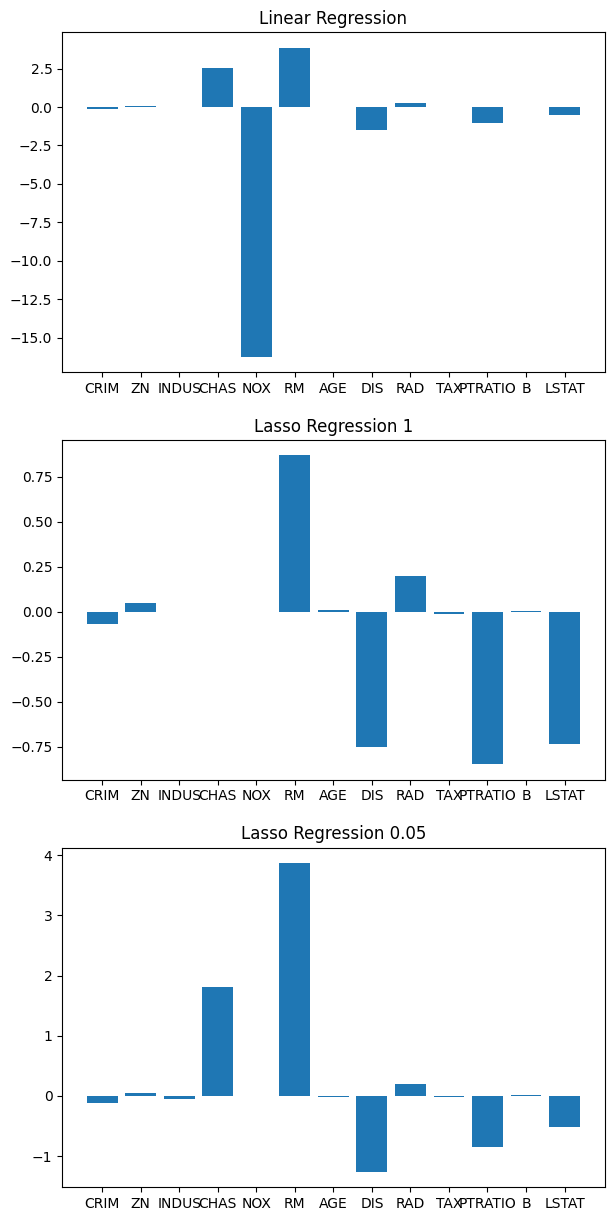

In [29]:
fig = plt.figure(figsize=(7, 15))

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=columns, height=model.coef_)
ax1.set_title('Linear Regression')

# lasso
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=columns, height=lasso.coef_)
ax2.set_title('Lasso Regression 1')

# lasso_005
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=columns, height=lasso_005.coef_)
ax3.set_title('Lasso Regression 0.05');

In [30]:
# データの確認
df = pd.read_csv('/content/drive/MyDrive/regression_pls.csv')
df.head(3)

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape

(1290, 197)

In [32]:
# データの切り分け -> ndarray に変換
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(1290, 196) (1290,)


In [33]:
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [34]:
# モデルの定義
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [35]:
# モデルの学習
model.fit(x_train, t_train)

LinearRegression()

In [36]:
# モデルの検証
print('train : ', model.score(x_train, t_train))
print('test : ', model.score(x_test, t_test))

train :  0.9365473244865767
test :  0.006164361245877936


In [37]:
# 相関係数の算出
df_corr = df.corr()
df_corr.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
Target,1.000000,-0.642326,-0.648078,-0.640489,-0.524453,NaN,0.111829,-0.360696,0.357026,0.113189,...,-0.032287,-0.015204,0.019244,-0.047169,NaN,0.007788,NaN,0.002448,-0.113820,0.043600
x1,-0.642326,1.000000,0.997571,0.999978,0.908895,NaN,0.322508,-0.117193,0.134074,0.298204,...,0.051291,0.186110,0.027947,-0.002219,NaN,0.001304,NaN,-0.015226,-0.038657,0.027857
x2,-0.648078,0.997571,1.000000,0.997252,0.883891,NaN,0.322631,-0.097297,0.115794,0.294947,...,0.047416,0.191792,0.029659,-0.007914,NaN,0.005912,NaN,-0.015106,-0.062823,0.027773
x3,-0.640489,0.999978,0.997252,1.000000,0.910855,NaN,0.324352,-0.120477,0.137237,0.300415,...,0.051542,0.186772,0.028046,-0.002001,NaN,0.001447,NaN,-0.015093,-0.038138,0.028359
x4,-0.524453,0.908895,0.883891,0.910855,1.000000,NaN,0.385792,-0.284647,0.293981,0.382603,...,0.044125,0.174983,0.022996,0.018780,NaN,-0.010834,NaN,-0.016378,0.027813,0.055553


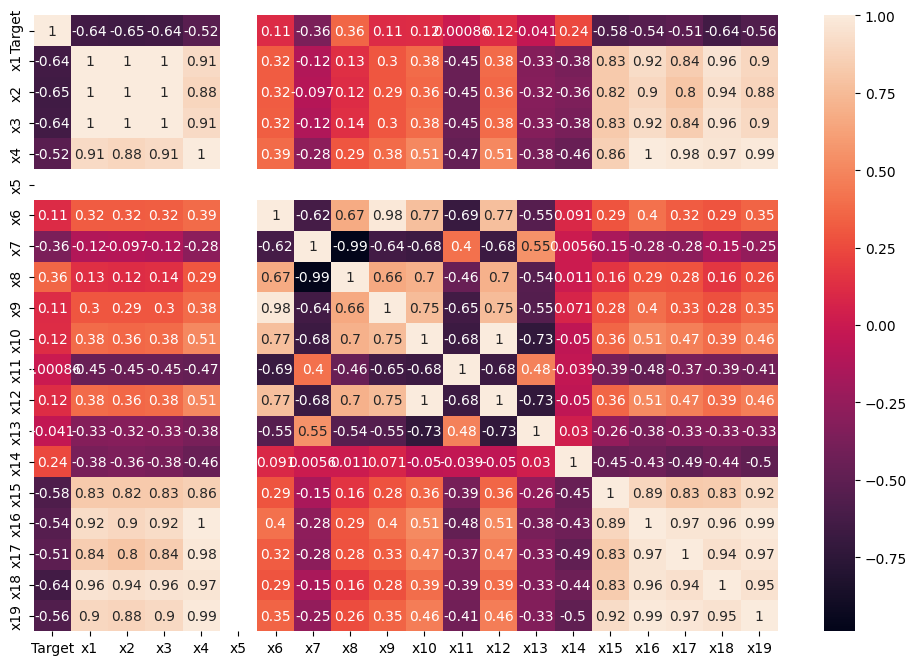

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.iloc[:20, :20], annot=True);

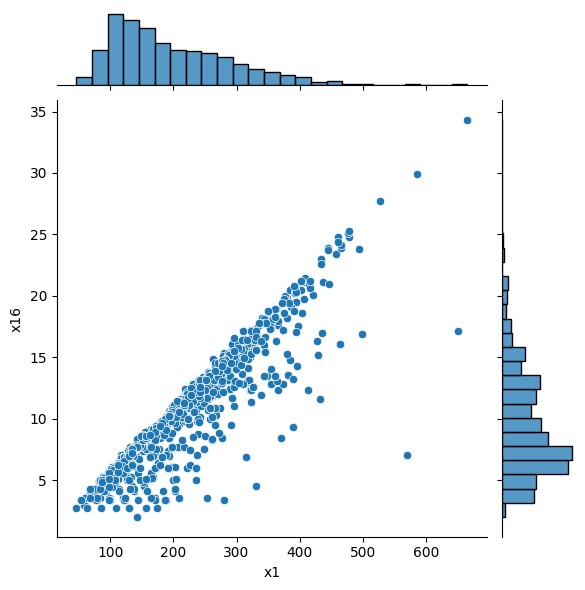

In [39]:
sns.jointplot(x='x1', y='x16', data=df);

In [40]:
# モデルの定義（ n_components:7 とする）
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=7)

In [41]:
# モデルの学習
pls.fit(x_train, t_train)

PLSRegression(n_components=7)

In [42]:
# モデルの検証
print('train score : ', pls.score(x_train, t_train))
print('test score : ', pls.score(x_test, t_test))

train score :  0.906376310202351
test score :  0.7387281471807322


確認テスト

In [46]:
# データの確認
df = pd.read_csv('/content/drive/MyDrive/diabetes_train.csv')
df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.012648,0.050680,0.000261,-0.011409,0.039710,0.057245,-0.039719,0.056081,0.024053,0.032059,259.0
1,-0.027310,-0.044642,-0.066563,-0.112400,-0.049727,-0.041397,0.000779,-0.039493,-0.035817,-0.009362,77.0
2,0.005383,-0.044642,0.059541,-0.056166,0.024574,0.052861,-0.043401,0.050914,-0.004220,-0.030072,91.0


In [49]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.153557,0.188303,0.368618,0.297202,0.244288,-0.093426,0.237258,0.307785,0.336885,0.182871
sex,0.153557,1.000000,0.091397,0.244075,0.044777,0.144798,-0.357750,0.316989,0.137324,0.244203,0.056318
bmi,0.188303,0.091397,1.000000,0.440057,0.294804,0.296430,-0.370819,0.421839,0.468184,0.408797,0.617070
bp,0.368618,0.244075,0.440057,1.000000,0.281198,0.208245,-0.221549,0.304720,0.452199,0.437636,0.459741
s1,0.297202,0.044777,0.294804,0.281198,1.000000,0.890232,0.006409,0.552291,0.541936,0.360728,0.240664
s2,0.244288,0.144798,0.296430,0.208245,0.890232,1.000000,-0.242837,0.664564,0.328657,0.312509,0.188779
s3,-0.093426,-0.357750,-0.370819,-0.221549,0.006409,-0.242837,1.000000,-0.759045,-0.394561,-0.302167,-0.424316
s4,0.237258,0.316989,0.421839,0.304720,0.552291,0.664564,-0.759045,1.000000,0.613149,0.454160,0.451752
s5,0.307785,0.137324,0.468184,0.452199,0.541936,0.328657,-0.394561,0.613149,1.000000,0.503512,0.602945
s6,0.336885,0.244203,0.408797,0.437636,0.360728,0.312509,-0.302167,0.454160,0.503512,1.000000,0.392760


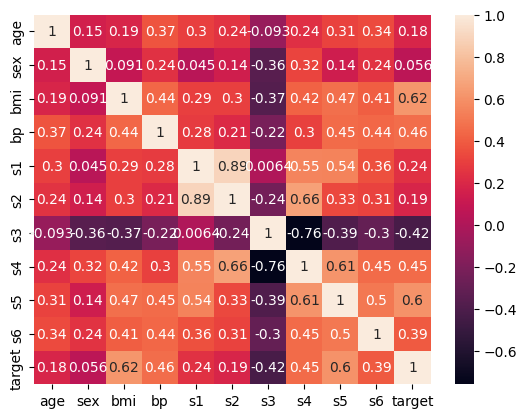

In [50]:
sns.heatmap(df.corr(), annot=True);